In [28]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import struct
import math
#from scipy.signal import hilbert, chirp
from scipy.fftpack import hilbert

In [9]:
frame_rate=50000
infile="./Audio_Speech_Actors_01-24/Actor_03/03-01-02-01-01-01-03.wav"
#infile="./test.wav"
num_samples=48000
wave_file=wave.open(infile,'r') #file read
data=wave_file.readframes(wave_file.getnframes())
print "duration=",wave_file.getnframes()/(1.0*wave_file.getframerate()),"s"
print "framerate=",wave_file.getframerate()
framerate=wave_file.getframerate()
num_samples=frames=wave_file.getnframes()
print "number of frames=",frames
print ""
wave_file.close()

duration= 3.83716666667 s
framerate= 48000
number of frames= 184184



In [10]:
data=struct.unpack('{n}h'.format(n=frames),data)
data=np.array(data)

In [105]:
p=int(framerate*5/1000)
f=np.zeros(20000,dtype=complex)
for i in range(20000):
    for x in range(330*p,331*p):
        f[i]+=data[x]*complex(math.cos((i/2)*x),math.sin((i/2)*x))


In [106]:
datax=data[330*p:331*p]
y=np.array([i for i in range(datax.size)])
y=y*datax
g=np.zeros(20000,dtype=complex)
for i in range(20000):
    for x in range(p):
        g[i]+=y[x]*complex(math.cos((i)*x),math.sin((i)*x))


    

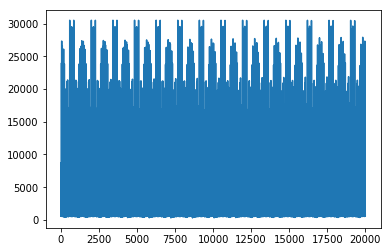

In [107]:
plt.plot((np.abs(f)))

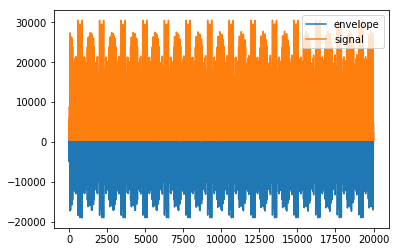

In [112]:
fig=plt.figure()
ax0=fig.add_subplot(111)
ax0.plot((hilbert((np.abs(f)))),label='envelope')
ax0.plot((np.abs(f)),label='signal')
ax0.legend()

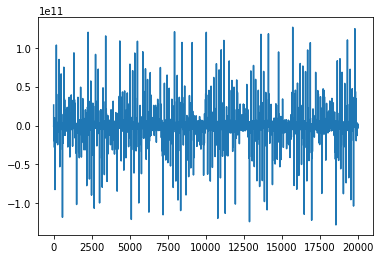

In [109]:
ngdx=np.real(f)*np.real(g)+np.imag(f)*np.imag(g)
plt.plot(ngdx)

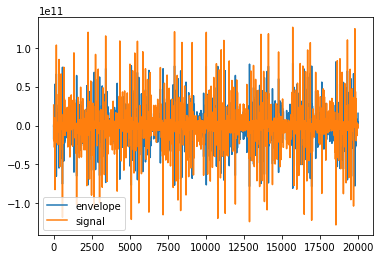

In [117]:
fig=plt.figure()
ax0=fig.add_subplot(111)
ax0.plot((hilbert(((ngdx)))),label='envelope') ## hngd of input
ax0.plot(((ngdx)),label='signal')
ax0.legend()

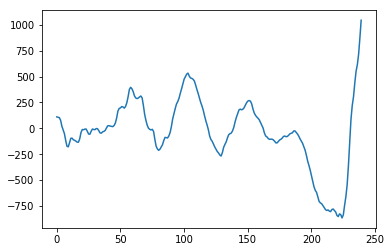

In [111]:
plt.plot(datax) ## input

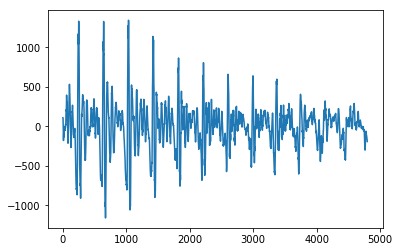

In [104]:
plt.plot(data[330*p:350*p])